<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Affine-Transformation/Affine_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Affine transformation

Affine transformation is a linear mapping method that preserves points, straight lines, and planes. Sets of parallel lines remain parallel after an affine transformation.

The affine transformation technique is typically used to correct for geometric distortions or deformations that occur with non-ideal camera angles. For example, satellite imagery uses affine transformations to correct for wide angle lens distortion, panorama stitching, and image registration. Transforming and fusing the images to a large, flat coordinate system is desirable to eliminate distortion. This enables easier interactions and calculations that don’t require accounting for image distortion.

The following table illustrates the different affine transformations: translation, scale, shear, and rotation.

<img src="https://github.com/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Affine-Transformation/img/87878787887.PNG?raw=true" >

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [13]:
def solve_affine(p):
    #p=np.matrix([[np.cos(p),-np.sin(p)],[np.sin(p),np.cos(p)]])
    p=np.matrix([[np.cos(p),np.sin(p),5],[-np.sin(p),np.cos(p),65],[0,0,1]])
    return p

In [14]:
q=np.array([[0.7,0,0],[0,0.7,0],[0,0,1]])

In [15]:
def solve_affine(p):
    p=np.matrix([[np.cos(p),np.sin(p),5],[-np.sin(p),np.cos(p),65],[0,0,1]])
    return p

In [16]:
p=solve_affine(0.523)
# 1.04_1.57_1.89

In [17]:
!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

--2020-12-13 21:29:51--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.54.48.211, 2a04:4e42:a::84
Connecting to i.pinimg.com (i.pinimg.com)|23.54.48.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.02s   

2020-12-13 21:29:51 (7.22 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



In [18]:
img = cv.imread('AMOL_IRAN.jpg')
img = cv.resize(img, (200,200), interpolation = cv.INTER_AREA)
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img = np.array(img)

In [19]:
m=img.shape[0]
n=img.shape[1]

In [20]:
out3 = np.zeros([m,n])

In [21]:
for i in range(0,m):
  for j in range(0,n):
    l = np.array([i,j,1])
    outy=np.dot(p,q)
    out = np.dot(outy,l)

    if m-1 > out[0,0] > 0 and n-1 > out[0,1] > 0 :
       x = int(round(out[0,0]))
       y = int(round(out[0,1]))
       if x < m or y < n :
         out3[[x],[y]] = img[[i],[j]]

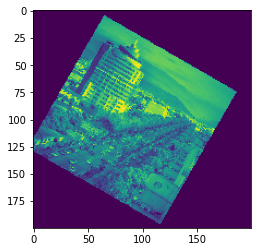

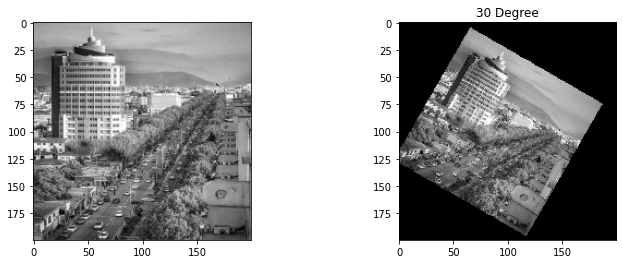

In [24]:
plt.imshow(out3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
plt.title("30 Degree")
ax1.imshow(img, cmap='gray')
ax2.imshow(out3, cmap='gray')
plt.show()